<a href="https://colab.research.google.com/github/MHaidarRais/E-Tilang-Yolo-V8-Helmet-and-Number-Plate/blob/main/YOLO%20Train%20helmet%20detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing the Required Libraries**

In [ ]:
#Importing  os to create a helper variable, which allows us to easily manages different paths in the code
import os


In [ ]:
#glob is used to return all file paths that match a specific pattern.
import glob

In [ ]:
# If we want to display a single image, then "Image" Library is fine, but if we want to display multiple images by just running a single cell
# then we need to import display

from IPython.display import Image, display

In [ ]:
# To clear output in the notebook use clear_output function
#display.clear_output()

# **In the First Step, We need to check whether we have access to the GPU or not**

In [ ]:
!nvidia-smi

Sat Jul  6 08:49:08 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
HOME = os.getcwd()

In [ ]:
print(HOME)

/content


#**Installing Ultralytics using Pip Install**

#**YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.**

In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -qe ultralytics

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
!pip install ultralytics==8.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.8/219.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 20.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-

##Checking whether YOLOv8 is Installed and its working Fine

In [ ]:
import ultralytics

In [ ]:
ultralytics.checks()

Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.3/78.2 GB disk)


#**Importing the PPE Detection Dataset from Roboflow**

In [ ]:
!mkdir {HOME}/datasets


In [ ]:
!pwd

/content


In [ ]:
%cd {HOME}/datasets


/content/datasets


In [ ]:
!pwd

/content/datasets


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="z8rfQNSqAmPN6VgCcLJg")
project = rf.workspace("onlytusik").project("helmet-rider-anpr-detection")
version = project.version(4)
dataset = version.download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.4 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.0, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Helmet,-Rider,-ANPR-Detection-4 in yolov8:: 100%|██████████| 4334/4334 [00:00<00:00, 6976.58it/s]


#**Train the YOLOv8 Model on the Custom Dataset**

In [ ]:
%cd {HOME}

/content


In [ ]:
%cd /content

/content


If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data=/content/HelmetRiderANPRDetection/data.yaml epochs=80 imgsz=640 v5loader=True

/content
100% 6.23M/6.23M [00:00<00:00, 402MB/s]

yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/HelmetRiderANPRDetection/data.yaml, epochs=80, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0.01, lrf=0.01, momentum=

In [ ]:
!ls /content/runs/detect/train4

args.yaml					    results.csv		 val_batch0_labels.jpg
confusion_matrix.png				    results.png		 val_batch0_pred.jpg
events.out.tfevents.1719829048.dc558d1b96da.9233.0  train_batch0.jpg	 val_batch1_labels.jpg
F1_curve.png					    train_batch1.jpg	 val_batch1_pred.jpg
P_curve.png					    train_batch2.jpg	 val_batch2_labels.jpg
PR_curve.png					    train_batch3500.jpg  val_batch2_pred.jpg
predictions.json				    train_batch3501.jpg  weights
R_curve.png					    train_batch3502.jpg


In [ ]:
!zip -r /content/file.zip /content/runs/detect/train

  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/train_batch7632.jpg (deflated 11%)
  adding: content/runs/detect/train/train_batch1.jpg (deflated 5%)
  adding: content/runs/detect/train/val_batch1_labels.jpg (deflated 3%)
  adding: content/runs/detect/train/events.out.tfevents.1720255814.32c0c4c67a50.1877.0 (deflated 72%)
  adding: content/runs/detect/train/results.png (deflated 13%)
  adding: content/runs/detect/train/val_batch1_pred.jpg (deflated 3%)
  adding: content/runs/detect/train/train_batch2.jpg (deflated 4%)
  adding: content/runs/detect/train/F1_curve.png (deflated 8%)
  adding: content/runs/detect/train/val_batch0_labels.jpg (deflated 4%)
  adding: content/runs/detect/train/P_curve.png (deflated 8%)
  adding: content/runs/detect/train/predictions.json (deflated 90%)
  adding: content/runs/detect/train/val_batch0_pred.jpg (deflated 4%)
  adding: content/runs/detect/train/train_batch7630.jpg (deflated 8%)
  adding: content/runs/detect/trai

#**Displaying the Confusion Matrix**

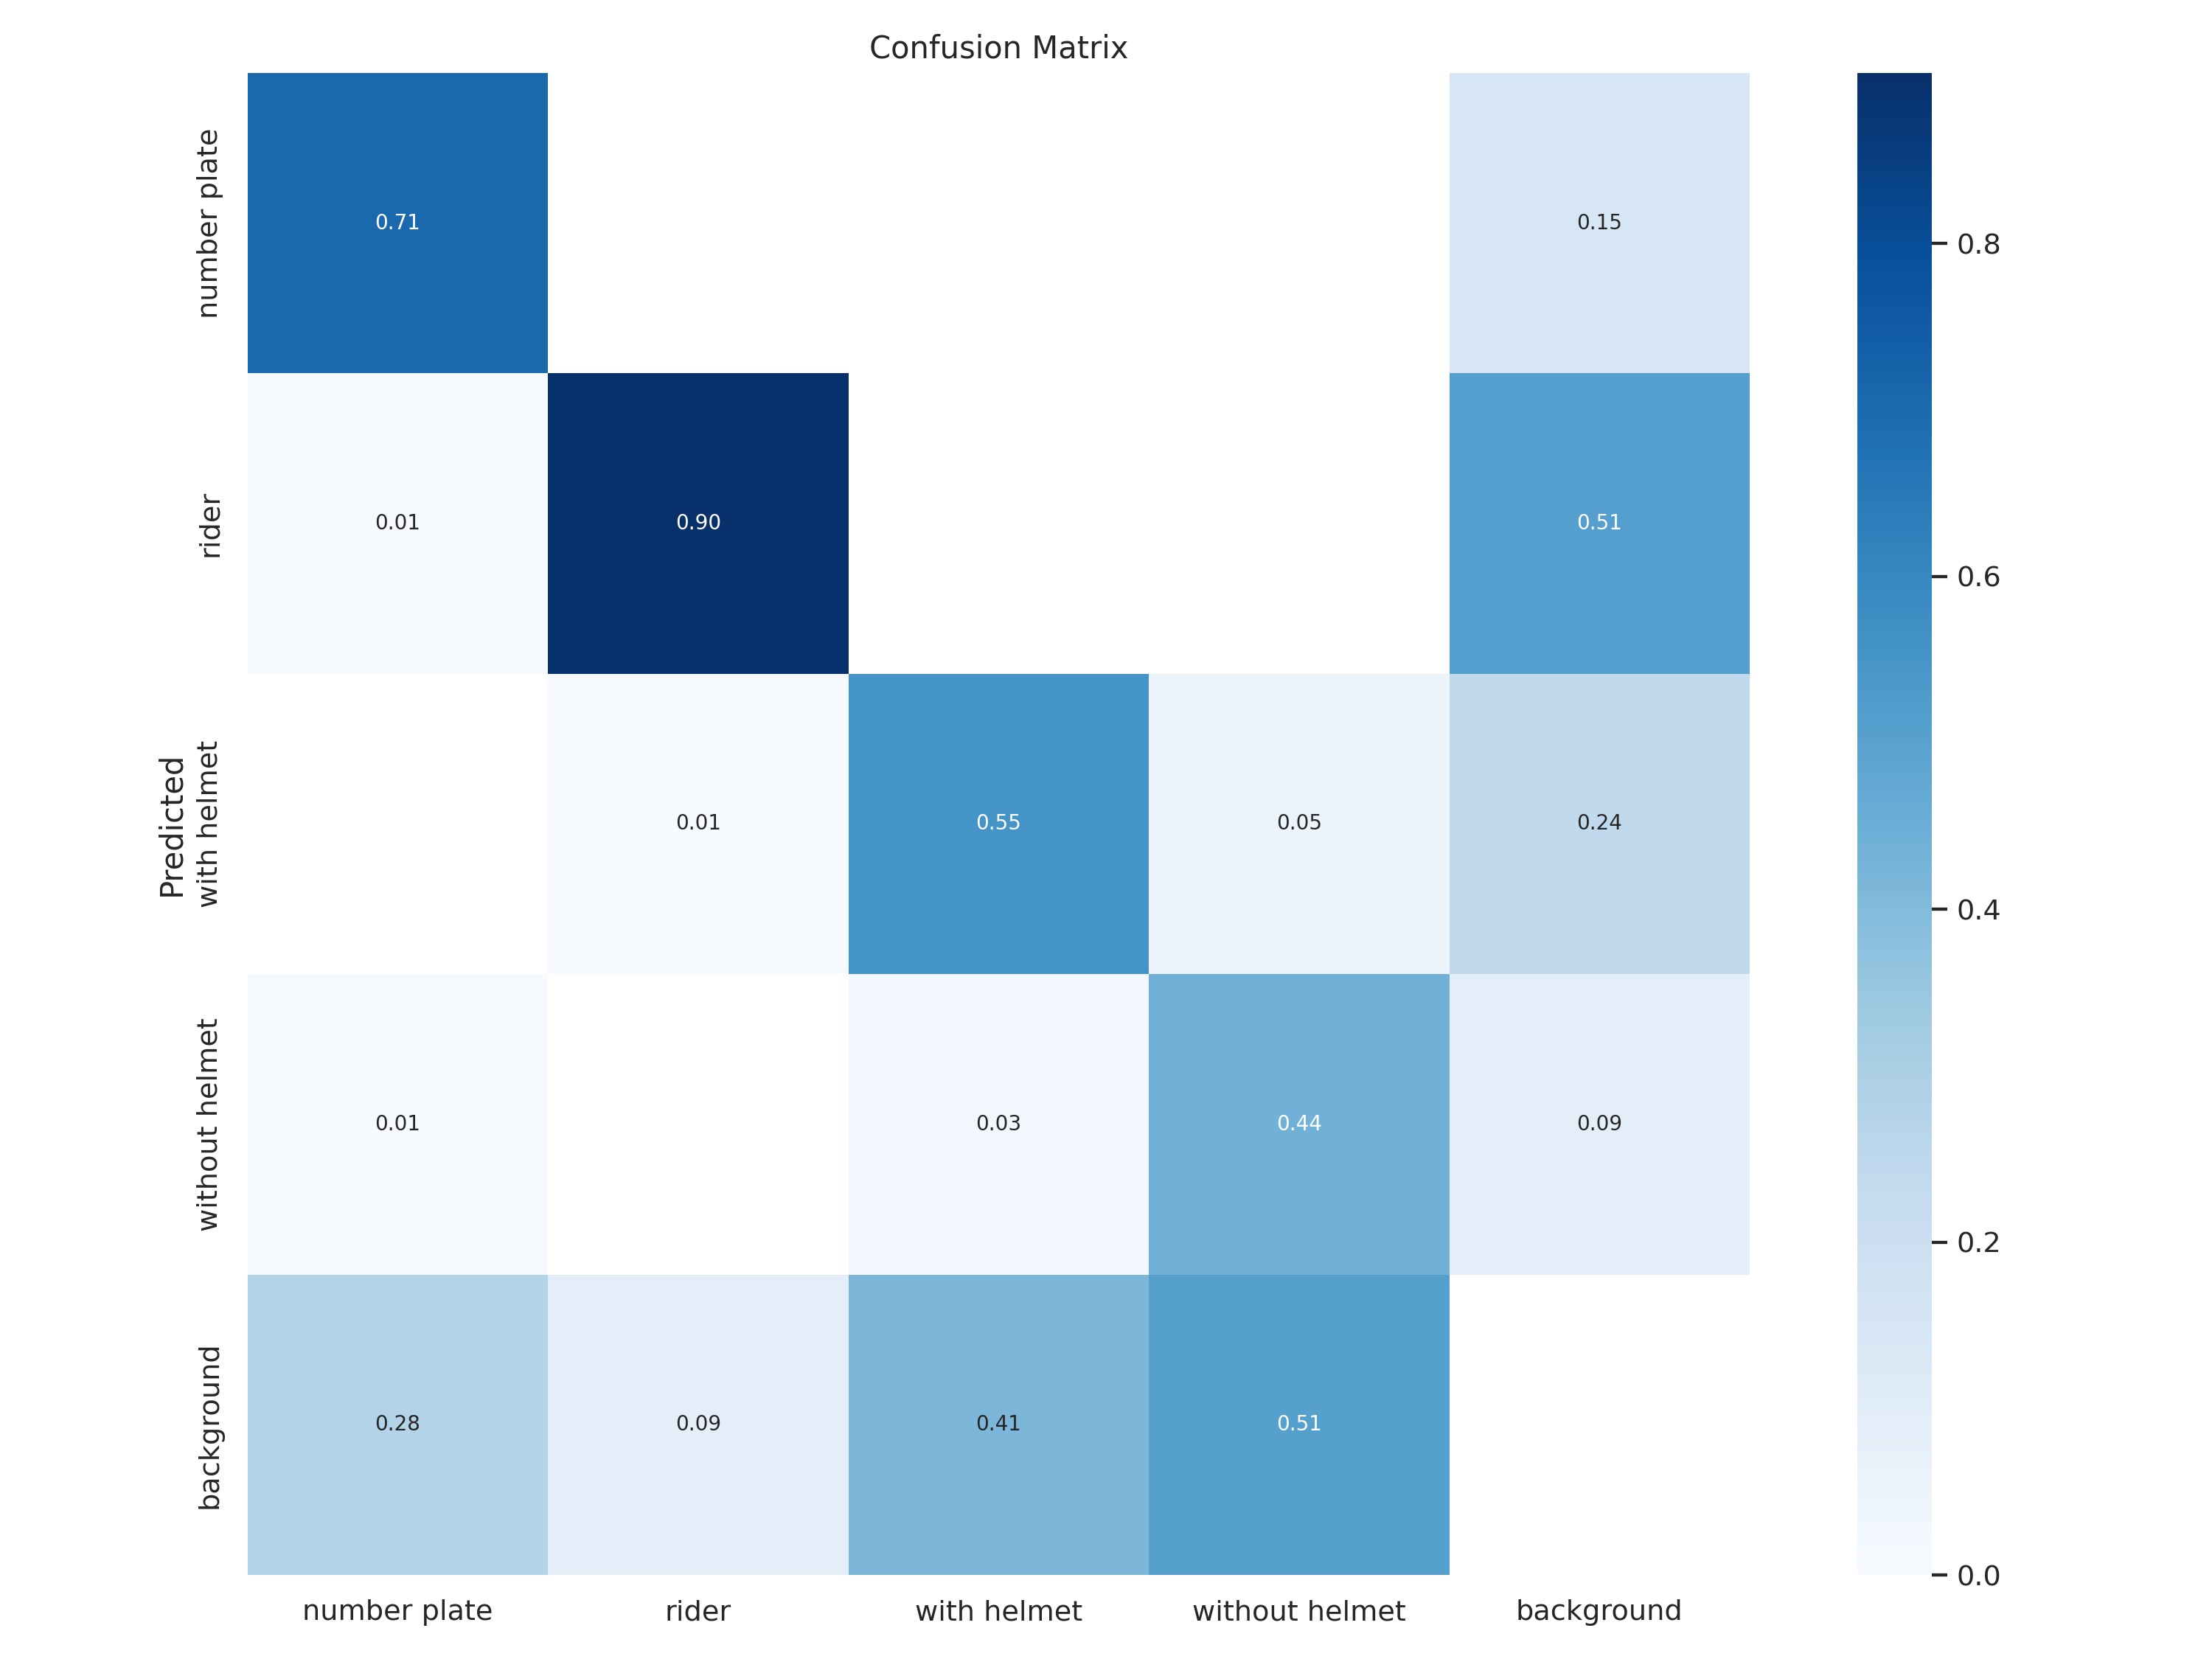

In [ ]:
#Confusion matrix is the chart that shows how our model handles different classes
#92% of the time the model detected correctly that the person is wearing jacket, while 1% of the time we get the Bounding Box but
#the jacket is incorrectly classified as Eye wear, while 7% of the time when person is wearing the Jacket the model is unable to detect it
#%cd {HOME}
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=900)

#**Training and Validation Loss**

/content


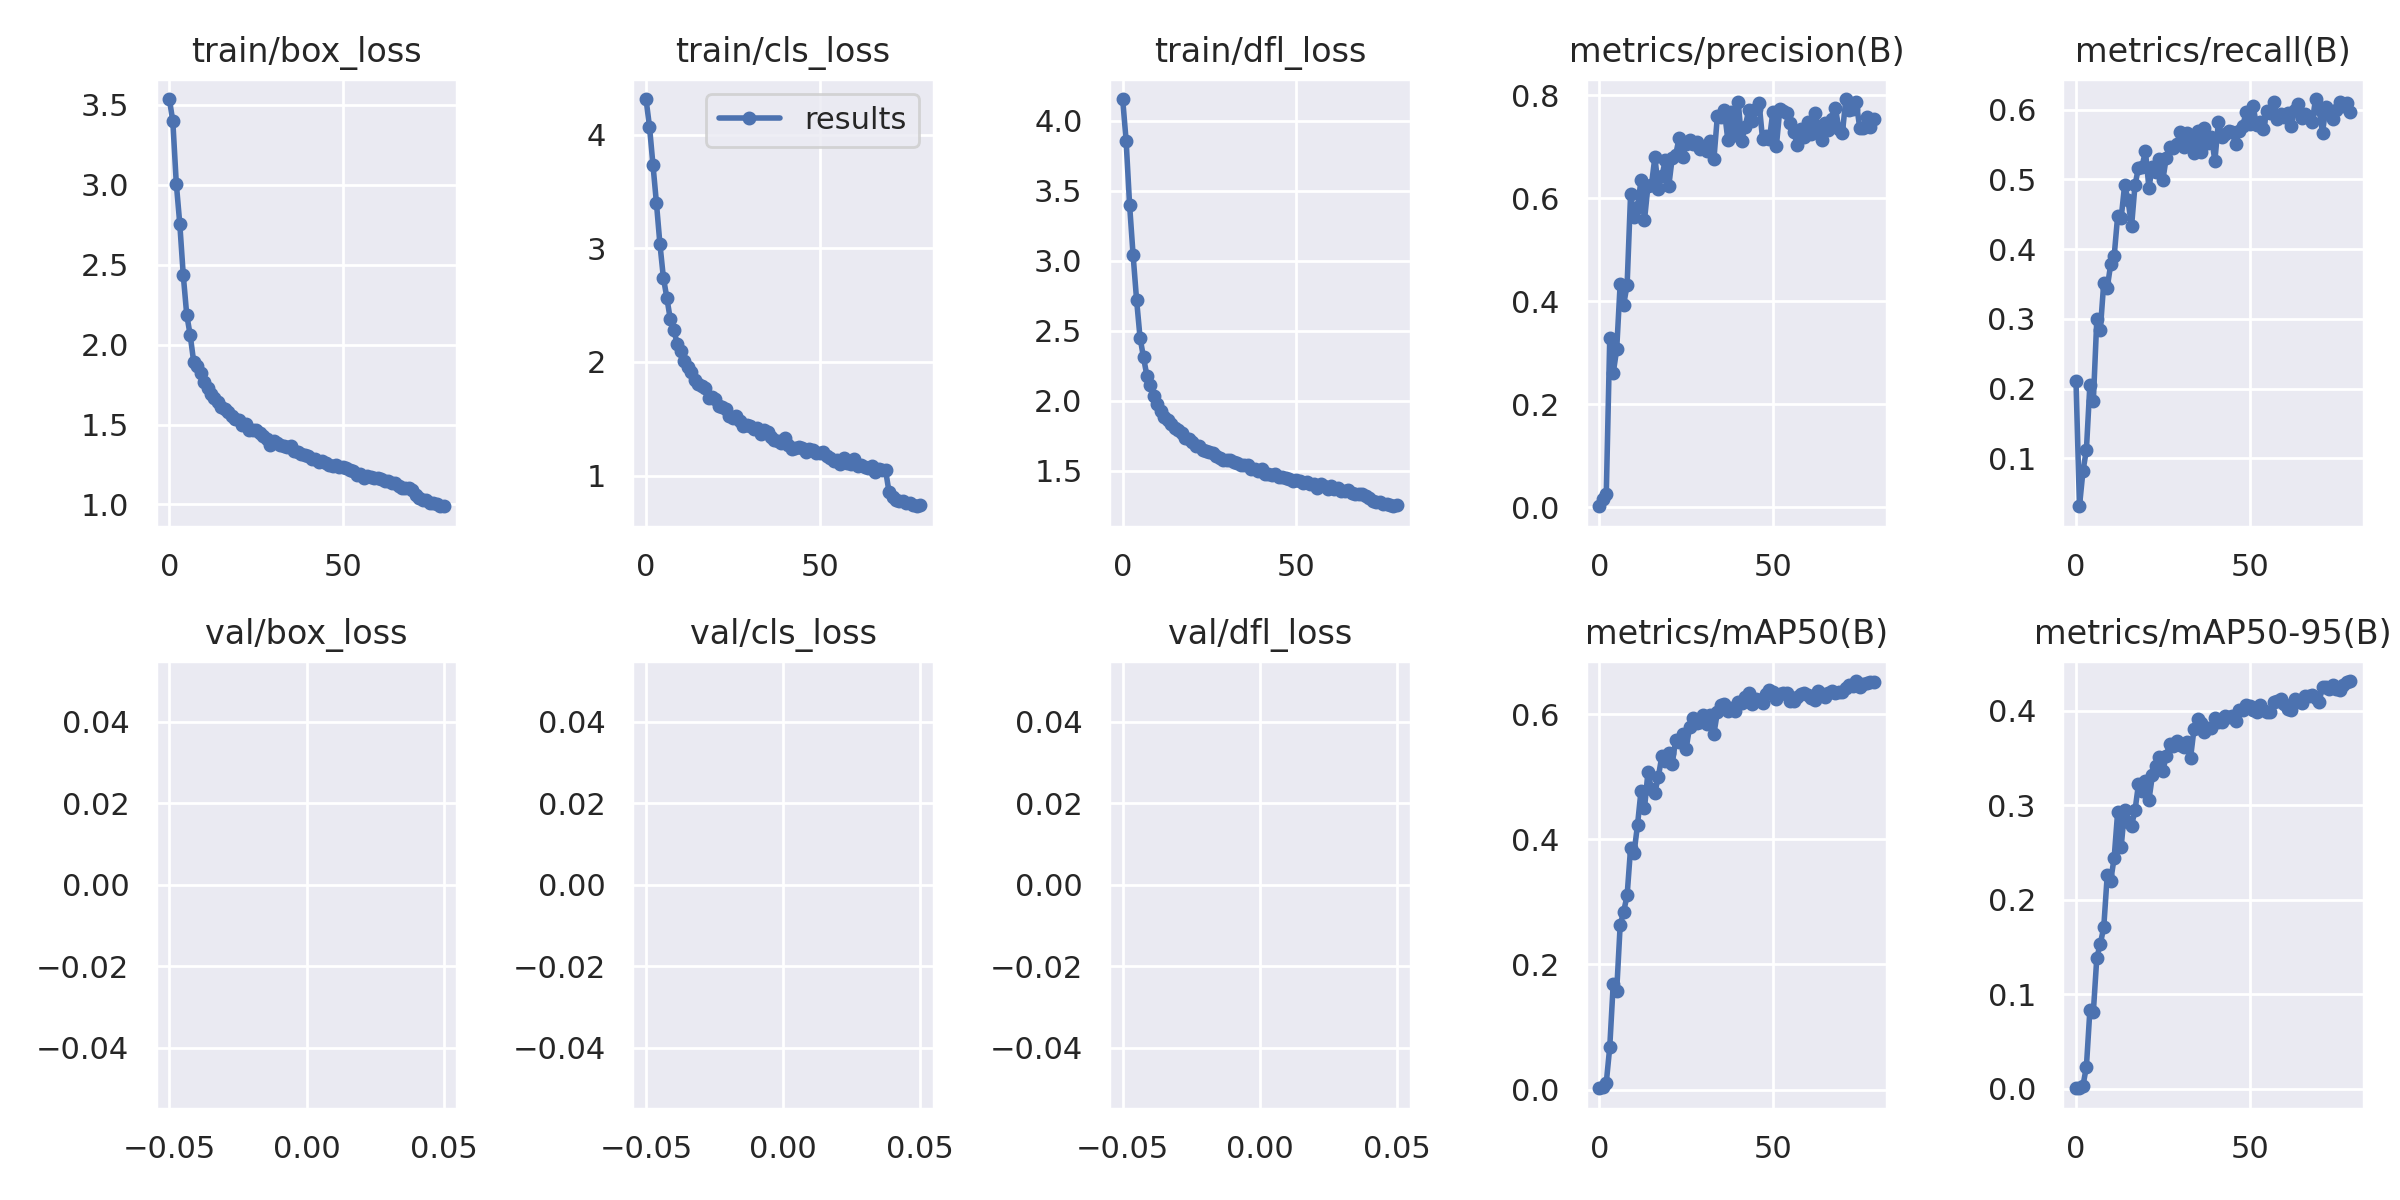

In [ ]:
# Here is the graph of the training and validation loss
#box loss and class loss is important
# The behavior of the model is convincing the model is coverging, Training more will give better results
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


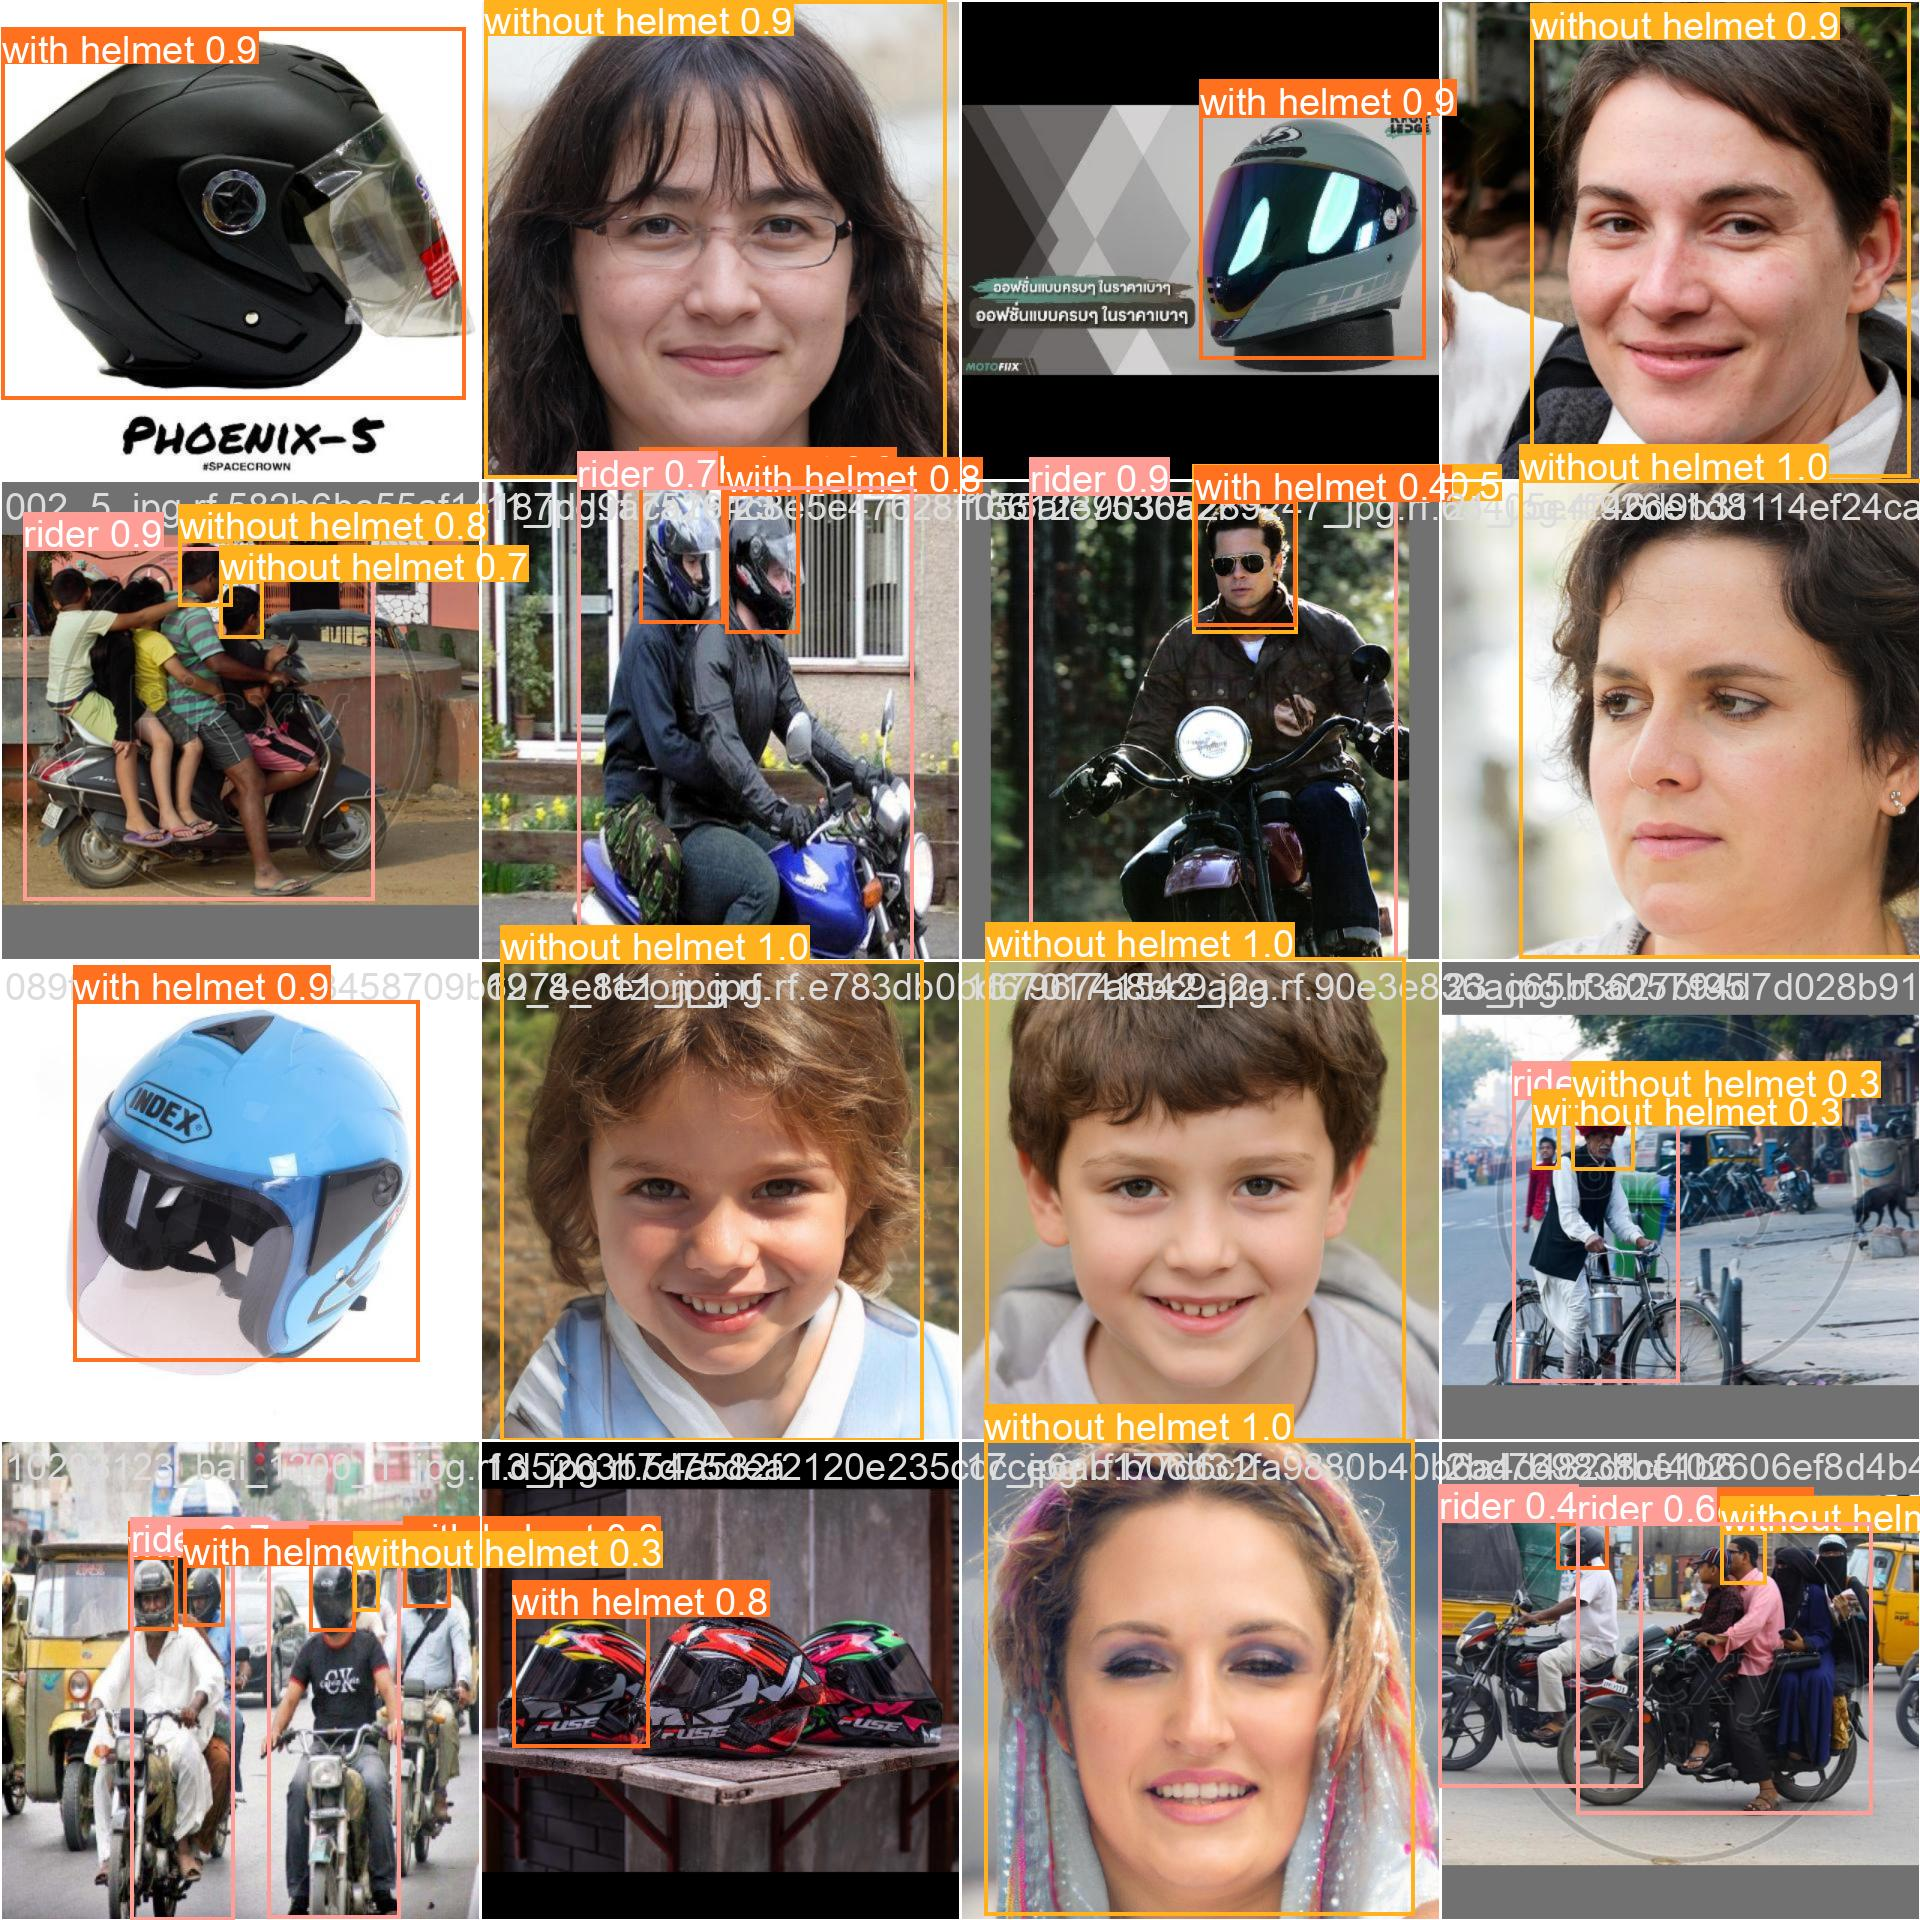

In [ ]:
#Model Prediction on validation batch. These image are not used strictly for training so it is always better to take a
#look and see how model is behaving
%cd {HOME}
Image(filename=f'/content/runs/detect/train/val_batch0_pred.jpg', width=600)

#**Validate Custom Model**

In [ ]:
#Here, we are taking the model best weights and using them to validate the model. Similarly as before we are using
#CLI to do that, The only difference is our mode = val instead of train

%cd {HOME}

!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=//content/HelmetRiderANPRDetection/data.yaml

/content
2024-07-06 10:36:00.315220: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-06 10:36:00.315267: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-06 10:36:00.316703: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-06 10:36:00.324450: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-06 10:36:01.636682: W tensor

#**Inference with Custom Model**

In [ ]:
#Inference means a prediction that we can run on an image to detect the label,
# whether classification or of a bounding box or a segmentation
# Testing the Model on Test Dataset images
%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source='/content/test/images'

/content
2024-03-28 18:29:36.683949: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-28 18:29:36.683999: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-28 18:29:36.685424: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-28 18:29:37.968206: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs
image 1/88 /content/test/images/test25_jpg.rf.9948971b6

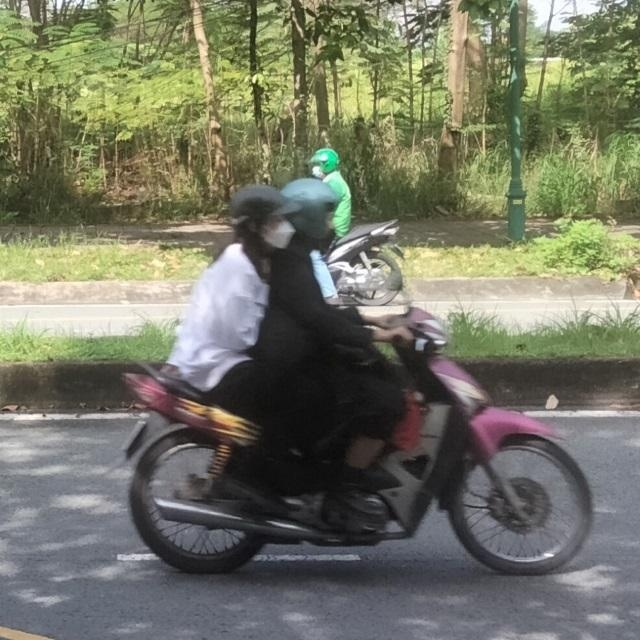

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict8/*.jpg')[:5]:
      display(Image(filename=image_path, width=600))
      print("\n")

#**Testing on a Demo Video**

In [ ]:
!gdown "https://drive.google.com/uc?id=1crFwrpMF1OlaJ0ZCZjBNRo9llLEVR8VQ&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1crFwrpMF1OlaJ0ZCZjBNRo9llLEVR8VQ&confirm=t
To: /content/demo.mp4
100% 42.9M/42.9M [00:00<00:00, 60.8MB/s]


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/detect/train10/weights/best.pt conf=0.25 source='/content/demo.mp4'

/content
2024-03-28 18:32:29.779785: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-28 18:32:29.779839: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-28 18:32:29.781325: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-28 18:32:31.072544: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs
video 1/1 (1/439) /content/demo.mp4: 384x640 2 1s, 76.2

#**Display the Demo Video**

In [ ]:
!rm "/content/result_compressed.mp4"

rm: cannot remove '/content/result_compressed.mp4': No such file or directory


In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict2/demo.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

#**Downloading the Demo Video2**

In [ ]:
!gdown "https://drive.google.com/uc?id=1cTIBNQ1R_7JAOURVv9cJ6P935ym_IkZ0&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1cTIBNQ1R_7JAOURVv9cJ6P935ym_IkZ0&confirm=t
To: /content/demo3.mp4
100% 20.3M/20.3M [00:00<00:00, 197MB/s]


#**Testing on the Demo Video**

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source='/content/demo3.mp4'

/content
Ultralytics YOLOv8.0.0 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
Model summary: 218 layers, 25843813 parameters, 0 gradients, 78.7 GFLOPs
video 1/1 (1/219) /content/demo3.mp4: 384x640 2 Protective Helmets, 1 Jacket, 27.3ms
video 1/1 (2/219) /content/demo3.mp4: 384x640 2 Protective Helmets, 1 Jacket, 26.5ms
video 1/1 (3/219) /content/demo3.mp4: 384x640 2 Protective Helmets, 1 Jacket, 26.5ms
video 1/1 (4/219) /content/demo3.mp4: 384x640 2 Protective Helmets, 1 Jacket, 26.5ms
video 1/1 (5/219) /content/demo3.mp4: 384x640 2 Protective Helmets, 1 Jacket, 26.5ms
video 1/1 (6/219) /content/demo3.mp4: 384x640 2 Protective Helmets, 1 Jacket, 26.5ms
video 1/1 (7/219) /content/demo3.mp4: 384x640 2 Protective Helmets, 1 Jacket, 26.5ms
video 1/1 (8/219) /content/demo3.mp4: 384x640 2 Protective Helmets, 1 Jacket, 26.5ms
video 1/1 (9/219) /content/demo3.mp4: 384x640 2 Protective Helmets, 1 Jacket, 26.5ms
video 1/1 (10/219) /content/demo3.mp4: 384x640 2 

#**Display the Demo Video**

In [ ]:
!rm "/content/result_compressed.mp4"

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict10/demo3.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

#**Downloading the Demo Video3**

In [ ]:
!gdown "https://drive.google.com/uc?id=1256pNK0nQnEDT6FRLQAraTRkOY7BSprq&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1256pNK0nQnEDT6FRLQAraTRkOY7BSprq&confirm=t
To: /content/demo4.mp4
100% 16.9M/16.9M [00:00<00:00, 195MB/s]


#**Testing on the Demo Video**

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source='/content/demo4.mp4'

/content
Ultralytics YOLOv8.0.0 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
Model summary: 218 layers, 25843813 parameters, 0 gradients, 78.7 GFLOPs
video 1/1 (1/337) /content/demo4.mp4: 384x640 2 Protective Helmets, 1 Jacket, 27.3ms
video 1/1 (2/337) /content/demo4.mp4: 384x640 2 Protective Helmets, 1 Jacket, 26.5ms
video 1/1 (3/337) /content/demo4.mp4: 384x640 2 Protective Helmets, 1 Jacket, 26.5ms
video 1/1 (4/337) /content/demo4.mp4: 384x640 2 Protective Helmets, 1 Jacket, 26.5ms
video 1/1 (5/337) /content/demo4.mp4: 384x640 2 Protective Helmets, 2 Jackets, 26.5ms
video 1/1 (6/337) /content/demo4.mp4: 384x640 2 Protective Helmets, 2 Jackets, 26.5ms
video 1/1 (7/337) /content/demo4.mp4: 384x640 2 Protective Helmets, 2 Jackets, 26.5ms
video 1/1 (8/337) /content/demo4.mp4: 384x640 2 Protective Helmets, 2 Jackets, 26.5ms
video 1/1 (9/337) /content/demo4.mp4: 384x640 2 Protective Helmets, 2 Jackets, 26.6ms
video 1/1 (10/337) /content/demo4.mp4: 384x6

#**Display the Demo Video**

In [ ]:
!rm "/content/result_compressed.mp4"

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict10/demo3.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)